In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv(r"C:\Users\ravi teja gundami\OneDrive\Desktop\adult_data.csv")
data.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary']

In [6]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.shape

(32561, 15)

In [8]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [9]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
def handle_capital_gain(data):
    data['capital_gain'] = np.where(data['capital_gain']==0,np.nan, data['capital_gain'])
    data['capital_gain'] = np.log(data['capital_gain'])
    data['capital_gain'] = data['capital_gain'].replace(np.nan,0)

handle_capital_gain(data)

In [12]:
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,9.552795,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,8.552174,0,40,United-States,>50K


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  int64  
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  int64  
 12  hours_per_week  32561 non-null  int64  
 13  native_country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [14]:
'''removing outlier using IQR(interQuartile Range)
STEP 1: Calculate the first and second quartile(Q1 and Q3) Q1 is 25% and Q3 is 75% additionally Q2 is 50%
STEP 2: evaluate IQR==> IQR=Q3-Q1
STEP 3: estimate lower bound==> lower bound = Q1*1.5
STEP 4: estimate upper bound==> upper bound = Q3*1.5
STEP 5: Replace the data points that lie outside the lower bound and upper bound with a NULL value'''

'removing outlier using IQR(interQuartile Range)\nSTEP 1: Calculate the first and second quartile(Q1 and Q3) Q1 is 25% and Q3 is 75% additionally Q2 is 50%\nSTEP 2: evaluate IQR==> IQR=Q3-Q1\nSTEP 3: estimate lower bound==> lower bound = Q1*1.5\nSTEP 4: estimate upper bound==> upper bound = Q3*1.5\nSTEP 5: Replace the data points that lie outside the lower bound and upper bound with a NULL value'

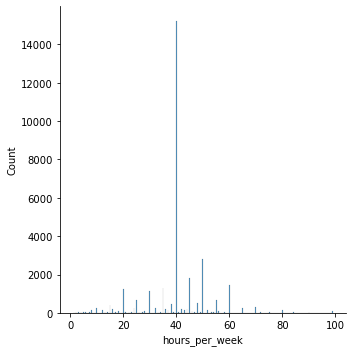

In [15]:
sns.displot(data['hours_per_week'])

c:\Users\ravi teja gundami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

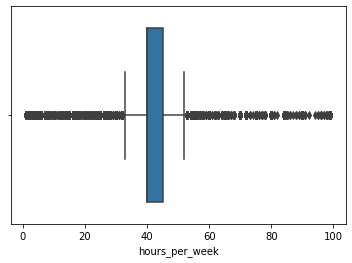

In [16]:
sns.boxplot(data['hours_per_week'])

In [17]:
def removing_outliers_hours_per_work(data):
   IQR = data['hours_per_week'].quantile(0.75) - data['hours_per_week'].quantile(0.25)
   
   lower_range = data['hours_per_week'].quantile(0.25) - (1.5 * IQR)
   upper_range = data['hours_per_week'].quantile(0.75) + (1.5 * IQR)

   data.loc[data['hours_per_week'] <= lower_range, 'hours_per_week'] = lower_range
   data.loc[data['hours_per_week'] >= upper_range, 'hours_per_week'] = upper_range
   

In [18]:
removing_outliers_hours_per_work(data)

c:\Users\ravi teja gundami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

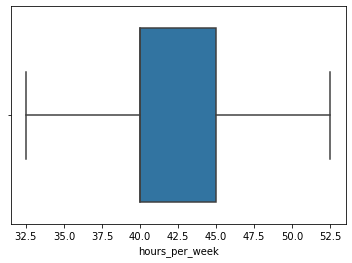

In [19]:
sns.boxplot(data['hours_per_week'])

# removing outliers from education_nm

c:\Users\ravi teja gundami\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education_num', ylabel='Density'>

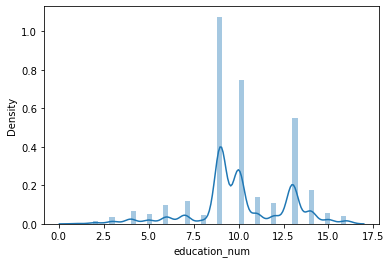

In [20]:
sns.distplot(data['education_num'])

c:\Users\ravi teja gundami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

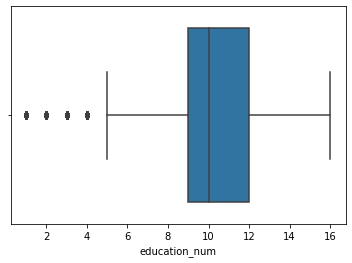

In [21]:
sns.boxplot(data['education_num'])

In [22]:
def removing_outliers_education_num(data):
    IQR = data['education_num'].quantile(0.75) - data['education_num'].quantile(0.25)

    lower_range = data['education_num'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['education_num'].quantile(0.75) + (1.5 * IQR)

    data.loc[data['education_num'] <= lower_range, 'education_num'] = lower_range
    data.loc[data['education_num'] >= upper_range, 'education_num'] = upper_range

In [24]:
removing_outliers_education_num(data)

c:\Users\ravi teja gundami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

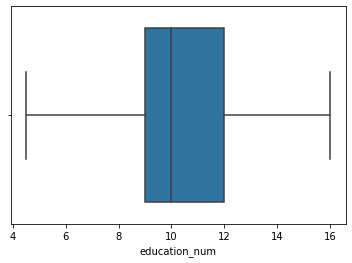

In [25]:
sns.boxplot(data['education_num'])

# removing outliers from capital_loss

c:\Users\ravi teja gundami\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital_loss', ylabel='Density'>

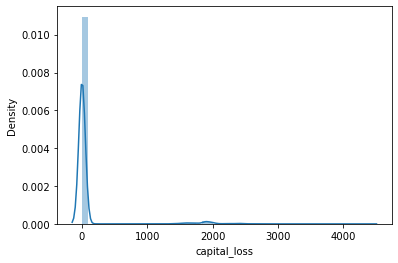

In [26]:
sns.distplot(data['capital_loss'])

c:\Users\ravi teja gundami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

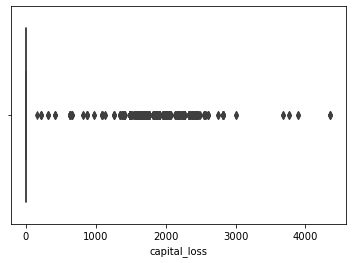

In [27]:
sns.boxplot(data['capital_loss'])

In [28]:
def capital_loss_log(df):
    data['capital_loss'] = np.where(data['capital_loss']==0,np.nan, data['capital_loss'])
    data['capital_loss'] = np.log(data['capital_loss'])
    data['capital_loss'] = data['capital_loss'].replace(np.nan,0)

In [29]:
capital_loss_log(data)

In [30]:
data.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,40.0,United-States,<=50K
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,32.5,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,45.0,United-States,>50K
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,9.552795,0.0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,8.552174,0.0,40.0,United-States,>50K


c:\Users\ravi teja gundami\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital_loss', ylabel='Density'>

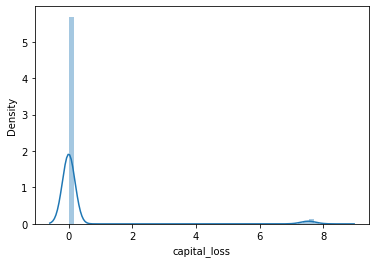

In [31]:
sns.distplot(data['capital_loss'])

c:\Users\ravi teja gundami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

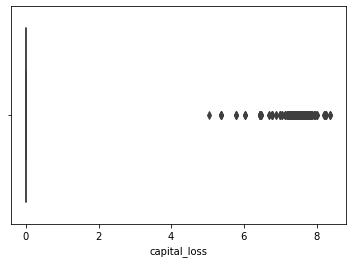

In [32]:
sns.boxplot(data['capital_loss'])

In [33]:
def removing_outliers_capital_loss(data):
    IQR = data['capital_loss'].quantile(0.75) - data['capital_loss'].quantile(0.25)

    lower_range = data['capital_loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = data['capital_loss'].quantile(0.75) - (1.5 * IQR)

    data.loc[data['capital_loss'] <= lower_range, 'capital_loss'] = lower_range
    data.loc[data['capital_loss'] >= upper_range, 'capital_loss'] = upper_range

In [34]:
removing_outliers_capital_loss(data)

c:\Users\ravi teja gundami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

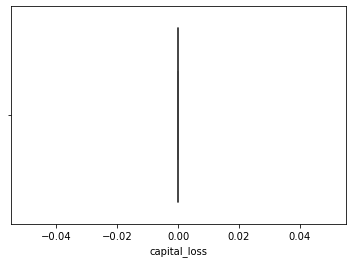

In [35]:
sns.boxplot(data['capital_loss'])

In [36]:
# x = {value : key for key,value in enumerate(data['race'].unique())}
# x

In [37]:
def feature_engineering(data):
    #converting salary into 1 if salary is greater than 50K else 0
    data['salary'] = data['salary'].replace(' >50K', 1)
    data['salary'] = data['salary'].replace(' <=50K', 0)
    # data['salary'] = np.where(data['salary'] == '>50K',1, 0)



    #convert the  sex column into 0 and 1 if male then 1 else 0
    data['sex'] = np.where(data['sex'] == 'Male',1 ,0)

    #doing label encoding for race column(0: 'White',1: 'Blsck',2: 'Asian-Pac-Islander',3:'Amer-Indian-Eskimo',4:'Other')
    label_enco_race = {value : key for key,value in enumerate(data['race'].unique())}
    data['race'] = data['race'].map(label_enco_race)

    #labeling the occupation
    #removing ? and replacing with Missing and labeling the occupation
    data['occupation'] = np.where(data['occupation']=='?','Missing',data['occupation'])
    label_enco_occu = {value: key for key,value in enumerate(data['occupation'].unique())}
    data['occupation'] = data['occupation'].map(label_enco_occu)

    #labeling the marital status
    label_enco_marital = {value: key for key, value in enumerate(data['marital_status'].unique())}
    data['marital_status'] = data['marital_status'].map(label_enco_marital)

    #labeling the educaton
    label_enco_edu = {value: key for key, value in enumerate(data['education'].unique())}
    data['education'] = data['education'].map(label_enco_edu)

    #labeling the workclass
    label_enco_workclass = {value: key for key,value in enumerate(data['workclass'].unique())}
    data['workclass'] = data['workclass'].map(label_enco_workclass)

    #labeling the native country
    label_enco_nativecountry = {value: key for key,value in enumerate(data['native_country'].unique())}
    data['native_country'] = data['native_country'].map(label_enco_nativecountry)

    #labeling the relationship
    label_enco_relation = {value:key for key,value in enumerate(data['relationship'].unique())}
    data['relationship'] = data['relationship'].map(label_enco_relation)

<AxesSubplot:>

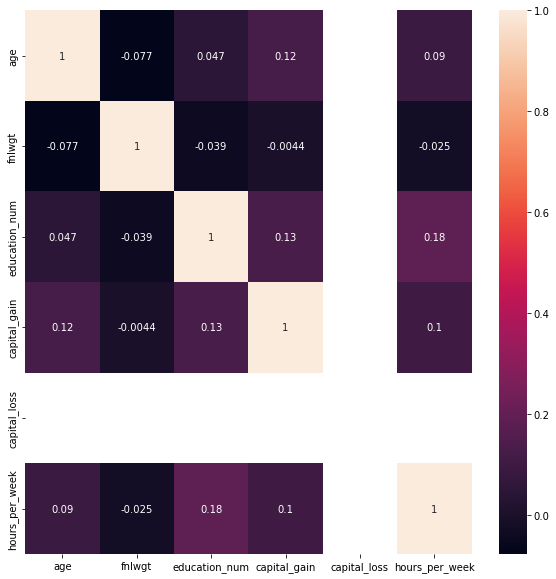

In [38]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)

In [39]:
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,40.0,United-States,<=50K
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,32.5,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,45.0,United-States,>50K
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,9.552795,0.0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,8.552174,0.0,40.0,United-States,>50K


<AxesSubplot:>

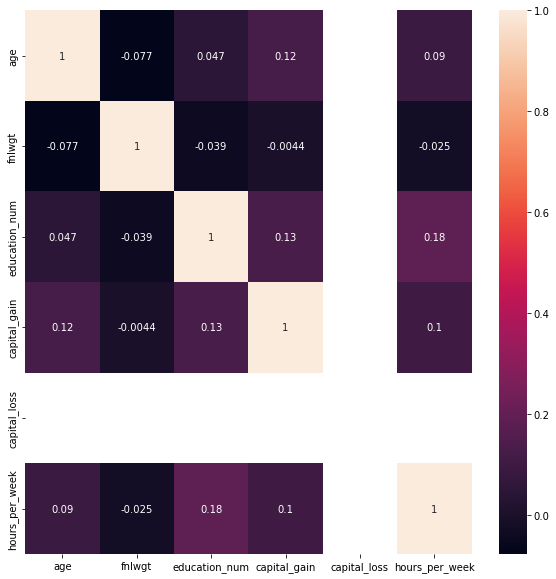

In [40]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)

In [41]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [42]:
data.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,40.0,United-States,<=50K
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,32.5,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,45.0,United-States,>50K
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,9.552795,0.0,50.0,United-States,>50K
9,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,8.552174,0.0,40.0,United-States,>50K


# after feature engineering

In [43]:
feature_engineering(data)

In [40]:
data.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,77516,0,13.0,0,0,0,0,0,7.684324,0.0,40.0,0,0
1,50,1,83311,0,13.0,1,1,1,0,0,0.000000,0.0,32.5,0,0
2,38,2,215646,1,9.0,2,2,0,0,0,0.000000,0.0,40.0,0,0
3,53,2,234721,2,7.0,1,2,1,1,0,0.000000,0.0,40.0,0,0
4,28,2,338409,0,13.0,1,3,2,1,0,0.000000,0.0,40.0,1,0
5,37,2,284582,3,14.0,1,1,2,0,0,0.000000,0.0,40.0,0,0
6,49,2,160187,4,5.0,3,4,0,1,0,0.000000,0.0,32.5,2,0
7,52,1,209642,1,9.0,1,1,1,0,0,0.000000,0.0,45.0,0,1
8,31,2,45781,3,14.0,0,3,0,0,0,9.552795,0.0,50.0,0,1
9,42,2,159449,0,13.0,1,1,1,0,0,8.552174,0.0,40.0,0,1


In [41]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [42]:
data.drop('fnlwgt', axis=1)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,0,7.684324,0.0,40.0,0,0
1,50,1,0,13.0,1,1,1,0,0,0.000000,0.0,32.5,0,0
2,38,2,1,9.0,2,2,0,0,0,0.000000,0.0,40.0,0,0
3,53,2,2,7.0,1,2,1,1,0,0.000000,0.0,40.0,0,0
4,28,2,0,13.0,1,3,2,1,0,0.000000,0.0,40.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,6,12.0,1,10,2,0,0,0.000000,0.0,38.0,0,0
32557,40,2,1,9.0,1,9,1,0,0,0.000000,0.0,40.0,0,1
32558,58,2,1,9.0,6,0,4,0,0,0.000000,0.0,40.0,0,0
32559,22,2,1,9.0,0,0,3,0,0,0.000000,0.0,32.5,0,0


<AxesSubplot:>

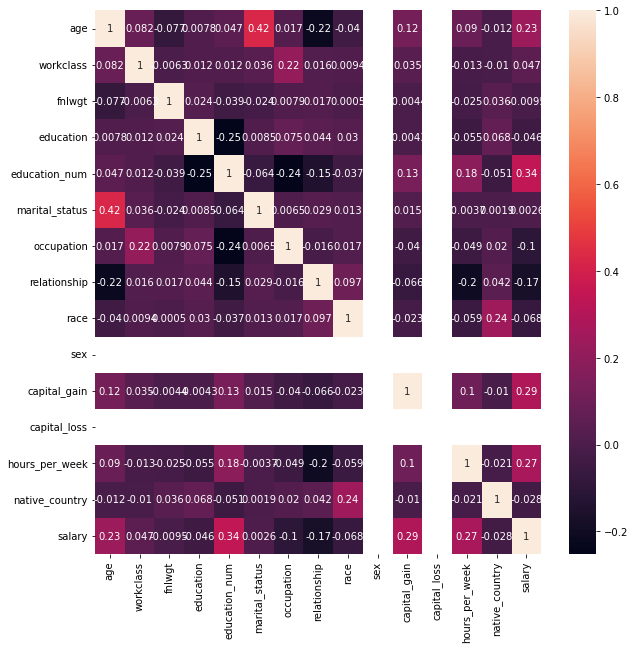

In [43]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot = True)

In [44]:
fdata = data.drop('fnlwgt',axis = 1)

In [45]:
fdata.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,0,7.684324,0.0,40.0,0,0
1,50,1,0,13.0,1,1,1,0,0,0.000000,0.0,32.5,0,0
2,38,2,1,9.0,2,2,0,0,0,0.000000,0.0,40.0,0,0
3,53,2,2,7.0,1,2,1,1,0,0.000000,0.0,40.0,0,0
4,28,2,0,13.0,1,3,2,1,0,0.000000,0.0,40.0,1,0


# train_test_split

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
sc = StandardScaler()

In [48]:
X = data[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [49]:
y = data['salary']

In [50]:
y.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [51]:
X = sc.fit_transform(X)

In [52]:
X

array([[ 0.03067056, -1.88460023, -0.99158435, ...,  0.        ,
        -0.194354  , -0.25574647],
       [ 0.83710898, -1.0687461 , -0.99158435, ...,  0.        ,
        -1.40659071, -0.25574647],
       [-0.04264203, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       [-1.21564337, -0.25289198, -0.70202542, ...,  0.        ,
        -1.40659071, -0.25574647],
       [ 0.98373415,  3.01052452, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647]])

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [54]:

print("train data shape = {}".format(X_train.shape))
print("test data shape = {}".format(X_test.shape))

train data shape = (22792, 13)
test data shape = (9769, 13)


In [55]:
#we are using logistic regression cause or target variable is in 0,1

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lg_model = LogisticRegression()

In [58]:
lg_model.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_pred = lg_model.predict(X_test)

In [60]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [61]:
result = {
    "actual": y_test,
    "predict": y_pred
}

In [62]:
pd.DataFrame(result)

,actual,predict
14160,0,0
27048,0,0
28868,1,0
5667,0,0
7827,0,1
...,...,...
32476,0,0
21100,0,0
27131,0,0
25526,1,0


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [64]:
print("accuracy score:{}",format(accuracy_score(y_test,y_pred)))
print("confusion_matrix:\n {}".format(confusion_matrix(y_test,y_pred)))
print("classification report:\n {}".format(classification_report(y_test,y_pred)))


accuracy score:{} 0.8097041662401474
confusion_matrix:
 [[6966  489]
 [1370  944]]
classification report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7455
           1       0.66      0.41      0.50      2314

    accuracy                           0.81      9769
   macro avg       0.75      0.67      0.69      9769
weighted avg       0.79      0.81      0.79      9769



In [65]:
f1_score(y_test,y_pred)

0.5038697624766479